<a href="https://colab.research.google.com/github/guy-davidi/Deep_Learning/blob/main/EM_VS_KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EM Vs. K-MEANS**

# **EM Algorithm**

In [1]:
# Guy Davidi 205493448

**Imports**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

**Constants**

In [3]:
N = 2000

**Model parameters**

In [4]:
model_means = [
    [1, 1], # mean of cluster 1
    [3, 3], # mean of cluster 2
]
model_covariances = [
    [[1, 0.], [0, 2]], # covariance of cluster 1
    [[2, 0], [0, 0.5]], # covariance of cluster 2
]
model_weights = [0.5, 0.5]  # weights of each cluster

In [5]:
def gen_data( means, covariances, weights):
    num_clusters = len(weights)
    data = []
    for i in range(N):
        # Use np.random.choice and weights to pick a cluster 
        k = np.random.choice(len(weights), 1, p=weights)[0]

        # Use np.random.multivariate_normal to create data from this cluster
        x = np.random.multivariate_normal(means[k], covariances[k])

        data.append(x)
    return data

**Generate data**

In [6]:
np.random.seed(4)
dataset = gen_data(model_means, model_covariances, model_weights)

**Expectation–maximization algorithm**

In [7]:
def EM(data, init_means, init_covariances, init_weights):
    
    # Make copies of initial parameters, which we will update during each iteration
    means = init_means[:]
    covariances = init_covariances[:]
    weights = init_weights[:]

    num_dim = len(data[0])
    num_clusters = 2
    

    r = np.zeros((N, num_clusters))

    for i in range(101):
        # E-step
        for j in range(N):
            for k in range(num_clusters):
                r[j, k] = weights[k] * multivariate_normal.pdf(data[j], mean = means[k], cov = covariances[k])         
        row_sums = r.sum(axis=1)[:, np.newaxis]
        # normalize
        r = r / row_sums 

        # M-step
        counts = np.sum(r, axis=0)
        for k in range(num_clusters):
            weights[k] = counts[k] * 1.0 / N
            w_sum = 0
            
            for j in range(N):
                w_sum += r[j, k] * data[j]
            
            means[k] = w_sum * 1.0 / counts[k]
            w_sum = np.zeros((num_dim, num_dim))
            
            for j in range(N):
                w_sum += r[j, k] * np.outer(data[j] - means[k], data[j] - means[k])
            # dot with the identedy change the ondiagonal
            covariances[k] = (w_sum * 1.0 / counts[k])*np.eye(2)

        if  i == 2 or i == 10 or i == 100:
            print(f"----------- The iteration is: {i} -----------")
            print("weights: ",np.round(weights,2))
            print("means: ",np.round(means,2))
            print("covariances: ",np.round(covariances,2))

**Initialization of parameters**

In [8]:
data_means = [np.squeeze(np.random.rand(1,2)*5), np.squeeze(np.random.rand(1,2)*5)]

data_covs = [
    [[np.random.uniform(0, 1)*5, 0.],
     [0, np.random.uniform(0, 1)*5]], # covariance of cluster 1, when X ~ uniform(0 , 5)

    [[np.random.uniform(0, 1)*5, 0],
     [0, np.random.uniform(0, 1)*5]], # covariance of cluster 2, when X ~ uniform(0 , 5)
]
randnum = np.random.uniform(0, 1)     # weights are X ~ uniform(0 , 1)
data_weights = [randnum, 1-randnum]

**Seed**

In [9]:
np.random.seed(4)

In [10]:
# Parameters after running EM
EM(dataset, data_means, data_covs, data_weights)

----------- The iteration is: 2 -----------
weights:  [0.47 0.53]
means:  [[1.61 1.74]
 [2.34 2.29]]
covariances:  [[[1.44 0.  ]
  [0.   2.65]]

 [[3.05 0.  ]
  [0.   1.62]]]
----------- The iteration is: 10 -----------
weights:  [0.47 0.53]
means:  [[0.97 0.95]
 [2.9  2.98]]
covariances:  [[[ 0.96 -0.  ]
  [-0.    1.88]]

 [[ 1.96  0.  ]
  [ 0.    0.52]]]
----------- The iteration is: 100 -----------
weights:  [0.48 0.52]
means:  [[0.97 1.  ]
 [2.94 2.98]]
covariances:  [[[ 0.96 -0.  ]
  [-0.    1.93]]

 [[ 1.89  0.  ]
  [ 0.    0.51]]]


# **K-means Algorithm**

**imports**

In [11]:
import numpy as np
import math
import random

**constants**

In [12]:
k = 2
n = 2000
dimen = 2

**init means**

In [13]:
means = []
means.append(random.randint(0,n-1))
while len(means)< k :
    temp = random.randint(0, n - 1)
    if temp not in means:
        means.append(temp)

# **K-mean Algorithm**

In [14]:
cl_mat = np.zeros((k,dimen)) 
size = np.zeros(k)
mean_mat = np.zeros((k,dimen)) 
cl_index = [None]*n


for i in range(k):
    mean_mat[i] = dataset[means[i]]

for p in range(0,101):
    cl_mat.fill(0)
    size.fill(0)
    for dg in range(n):
        gr = np.array([])
        for mean in mean_mat:
            gr = np.append(gr,(np.sum((np.array(dataset[dg]) - np.array(mean))**2)))
        index = np.argmin(gr)
        
        # min-distance
        cl_mat[index] += dataset[dg]
        
        # clustersize
        size[index] += 1
        if(cl_index[dg] == None or index != cl_index[dg]):
            cl_index[dg] = index

    for i in range(k):
        mean_mat[i] = np.divide(cl_mat[i],size[i])
    
    if  p == 2 or p == 10 or p == 100:
        print(f"----------- The iteration is: {p} -----------")
        print("K-Means result is")
        print("K-Means means: \n",np.round(mean_mat,2))
        print("\n")     


----------- The iteration is: 2 -----------
K-Means result is
K-Means means: 
 [[2.9  2.98]
 [0.79 0.76]]


----------- The iteration is: 10 -----------
K-Means result is
K-Means means: 
 [[3.08 3.01]
 [0.82 0.96]]


----------- The iteration is: 100 -----------
K-Means result is
K-Means means: 
 [[3.08 3.01]
 [0.82 0.96]]




# **We can see that K-means algorithm gives better approximation for the means**

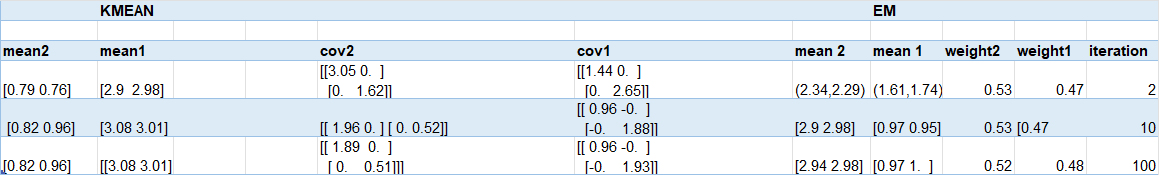